In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [7]:
data = pd.read_csv('AnnualTicketSales.csv')
df = pd.DataFrame(data)

In [8]:
df

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN
5,2016,"1,30,25,56,378","$11,267,115,924","$11,931,416,424",$8.65,NaN
6,2015,"1,32,33,56,776","$11,155,900,636","$12,121,948,075",$8.43,NaN
7,2014,"1,25,74,02,920","$10,272,985,008","$11,517,810,744",$8.17,NaN
8,2013,"1,33,91,68,926","$10,887,446,341","$12,266,787,382",$8.13,NaN
9,2012,"1,38,09,21,942","$10,992,141,616","$12,649,244,986",$7.96,NaN


In [9]:
df['TICKETS SOLD'] = df['TICKETS SOLD'].str.replace(',' , '')
df['AVERAGE TICKET PRICE'] = df['AVERAGE TICKET PRICE'] .str.replace('$' , '')
print(df['AVERAGE TICKET PRICE'])

0     9.16
1     9.16
2     9.16
3     9.11
4     8.97
5     8.65
6     8.43
7     8.17
8     8.13
9     7.96
10    7.93
11    7.89
12    7.50
13    7.18
14    6.88
15    6.55
16    6.41
17    6.21
18    6.03
19    5.81
20    5.66
21    5.39
22    5.08
23    4.69
24    4.59
25    4.42
26    4.35
Name: AVERAGE TICKET PRICE, dtype: object


In [10]:
df["TICKETS SOLD"] = df["TICKETS SOLD"].astype(np.int64)
df["AVERAGE TICKET PRICE"] = df["AVERAGE TICKET PRICE"].astype(np.float64)
df['TICKETS SOLD'] = df["TICKETS SOLD"] / df["AVERAGE TICKET PRICE"]
df["TICKETS SOLD"]

0     4.626363e+07
1     2.441473e+07
2     1.341203e+08
3     1.439666e+08
4     1.366377e+08
5     1.505846e+08
6     1.569818e+08
7     1.539049e+08
8     1.647194e+08
9     1.734827e+08
10    1.617800e+08
11    1.683839e+08
12    1.891423e+08
13    1.891424e+08
14    2.064007e+08
15    2.135478e+08
16    2.141935e+08
17    2.408456e+08
18    2.528341e+08
19    2.712145e+08
20    2.589884e+08
21    2.592690e+08
22    2.843827e+08
23    3.078534e+08
24    2.957189e+08
25    2.952989e+08
26    2.808519e+08
Name: TICKETS SOLD, dtype: float64

<Figure size 1152x432 with 0 Axes>

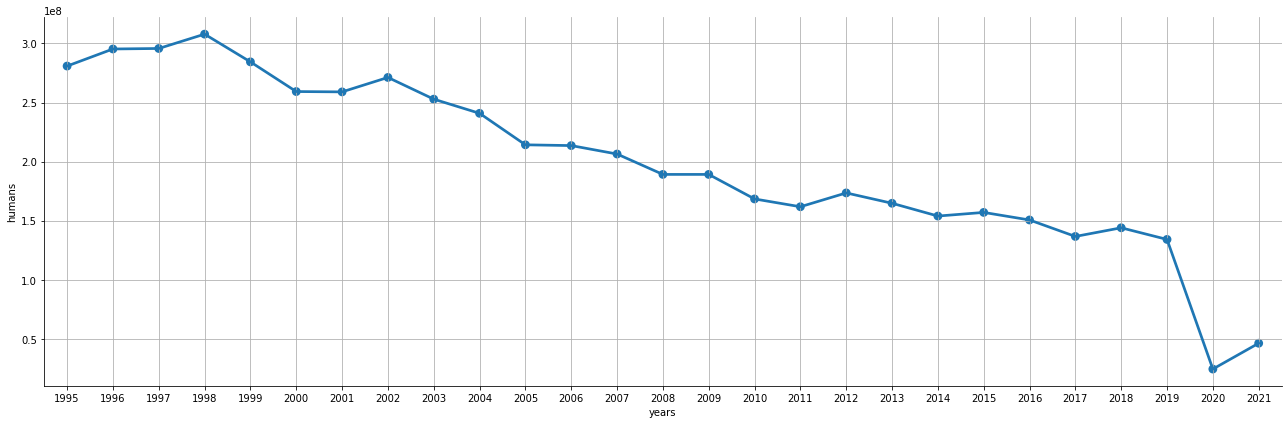

In [13]:
plt.figure(figsize = (16,6))
ax = sns.catplot (x = "YEAR",y="TICKETS SOLD" , kind="point", data=df , height = 6 , aspect = 3)
plt.ylabel("humans")
plt.xlabel("years")
plt.grid(True)

In [35]:
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA

iris = load_iris()
df['target'] = iris.target
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
print(df)
#고차원 데이터임

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)     target
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]


In [26]:
#1차원으로 만들어야지
pca = PCA(n_components=1)
#정규화
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


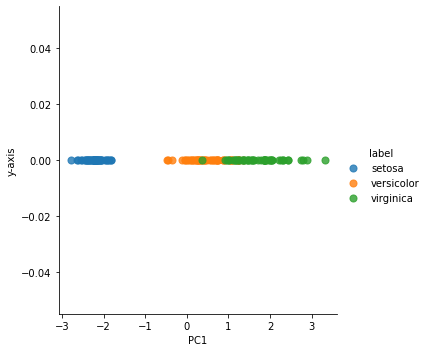

In [34]:
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
Y = df['target']
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color